In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
usecase='UC4'
os=5
poll_rate = 60
location = 'DS'
common_path = '../data/'
if os==10 and poll_rate ==60 and usecase=='UC1':
    path='csvs/UC1/'+location+'_merged_phy_cyb_10os_60poll_encoded.csv'
    adv_path='Adversary/UC1_PyDNP3_CORE_Adversary_10_OS_60_dnp3.json'
elif os==10 and poll_rate ==30 and usecase=='UC1':
    path='csvs/UC1/'+location+'_merged_phy_cyb_10os_30poll_encoded.csv'
    adv_path='Adversary/UC1_PyDNP3_CORE_Adversary_10_OS_30_dnp3.json'
elif os==5 and poll_rate ==30 and usecase=='UC2':
    path='csvs/UC2/uc2_'+location+'_merged_phy_cyb_5os_30poll_encoded.csv'
    adv_path='Adversary/UC2_PyDNP3_CORE_Adversary_5_OS_30_dnp3.json'
elif os==5 and poll_rate ==60 and usecase=='UC2':
    path='csvs/UC2/uc2_'+location+'_merged_phy_cyb_5os_60poll_encoded.csv'
    adv_path='Adversary/UC2_PyDNP3_CORE_Adversary_5_OS_60_dnp3.json'
elif os==10 and poll_rate ==30 and usecase=='UC2':
    path='csvs/UC2/uc2_'+location+'_merged_phy_cyb_10os_30poll_encoded.csv'
    adv_path='Adversary/UC2_PyDNP3_CORE_Adversary_10_OS_30_dnp3.json'
elif os==10 and poll_rate ==60 and usecase=='UC2':
    path='csvs/UC2/uc2_'+location+'_merged_phy_cyb_10os_60poll_encoded.csv'
    adv_path='Adversary/UC2_PyDNP3_CORE_Adversary_10_OS_60_dnp3.json'
elif os==5 and poll_rate ==30 and usecase=='UC3':
    path='csvs/UC3/uc3_'+location+'_merged_phy_cyb_5os_30poll_encoded.csv'
    adv_path='Adversary/UC3_PyDNP3_CORE_Adversary_5_OS_30_dnp3.json'
elif os==5 and poll_rate ==60 and usecase=='UC3':
    path='csvs/UC3/uc3_'+location+'_merged_phy_cyb_5os_60poll_encoded.csv'
    adv_path='Adversary/UC3_PyDNP3_CORE_Adversary_5_OS_60_dnp3.json'
elif os==10 and poll_rate ==30 and usecase=='UC3':
    path='csvs/UC3/uc3_'+location+'_merged_phy_cyb_10os_30poll_encoded.csv'
    adv_path='Adversary/UC3_PyDNP3_CORE_Adversary_10_OS_30_dnp3.json'
elif os==10 and poll_rate ==60 and usecase=='UC3':
    path='csvs/UC3/uc3_'+location+'_merged_phy_cyb_10os_60poll_encoded.csv'
    adv_path='Adversary/UC3_PyDNP3_CORE_Adversary_10_OS_60_dnp3.json'
elif os==5 and poll_rate ==30 and usecase=='UC4':
    path='csvs/UC4/uc4_'+location+'_merged_phy_cyb_5os_30poll_encoded.csv'
    adv_path='Adversary/UC4_PyDNP3_CORE_Adversary_5_OS_30_dnp3.json'
elif os==5 and poll_rate ==60 and usecase=='UC4':
    path='csvs/UC4/uc4_'+location+'_merged_phy_cyb_5os_60poll_encoded.csv'
    adv_path='Adversary/UC4_PyDNP3_CORE_Adversary_5_OS_60_dnp3.json'
elif os==10 and poll_rate ==30 and usecase=='UC4':
    path='csvs/UC4/uc4_'+location+'_merged_phy_cyb_10os_30poll_encoded.csv'
    adv_path='Adversary/UC4_PyDNP3_CORE_Adversary_10_OS_30_dnp3.json'
elif os==10 and poll_rate ==60 and usecase=='UC4':
    path='csvs/UC4/uc4_'+location+'_merged_phy_cyb_10os_60poll_encoded.csv'
    adv_path='Adversary/UC4_PyDNP3_CORE_Adversary_10_OS_60_dnp3.json'
path = common_path + path
adv_path = common_path + adv_path


In [2]:
from DataFusion import DataFusion
import time
import datetime
def get_intrusion_window(adversary_path):
    fusion = DataFusion()
    fusion.load_json(adversary_path)
    fusion.extract_cyber_data()
    fusion.extract_physical_data()
    data_to_process = fusion.merge()
    attack_start = data_to_process.iloc[0]['Time']
    start = int(time.mktime(attack_start.timetuple()))
    attack_end = data_to_process.iloc[-1]['Time']
    end = int(time.mktime(attack_end.timetuple()))
    return start,end
    

In [3]:
start_time,end_time = get_intrusion_window(adv_path)

In [4]:
data = pd.read_csv(path)


#data.drop('Unnamed:0',1)
data = data.drop(data.columns[[0]], axis=1)
data['DNP3 Objects'].replace('None', np.nan, inplace=True)

replace_map = dict([('DNP3 Objects',0),('value1', 0.0), ('value2', 0.0), ('value3', 0.0), 
               ('value4', 0.0),('value5',0.0)])

# fill nan by replace values
data = data.fillna(value=replace_map)
data.head()

data['Time'] = pd.to_datetime(data['Time'])

data['Label'] = 0
for i,val in data.iterrows():
    unix_time = int(time.mktime(val['Time'].timetuple()))
    if unix_time <end_time and unix_time>start_time:
        data['Label'][i] = 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
# compute the feature table
feature_table = data.drop(columns=['Time', 'snort_alert', 'snort_alert_type','Label'])
#feature_table = data[['value1','value2','value3','value4']]
feature_table

,frame_len,frame_protocols,eth_src,eth_dst,ip_src,ip_dst,ip_len,ip_flags,tcp_srcport,tcp_dstport,...,TL_dnp3_tr_ctl,AL_dnp3_al_func,AL_dnp3_al_ctl,AL_dnp3_obj,DNP3 Object Count,DNP3 Objects,AL_Payload,value1,value2,value3
0,42,0,2,3,0,0,0,0,0,0,...,0,129,9,1,42,1,13,0.0000,0.0000,1350.5500
1,42,0,2,3,0,0,0,0,0,0,...,0,129,3,1,38,1,60,0.0000,0.0000,1350.5500
2,42,0,2,3,0,0,0,0,0,0,...,0,129,5,2,32,255,41,-56.2576,0.0000,1350.5500
3,60,0,0,3,0,0,0,0,0,0,...,0,129,14,1,55,2,30,-56.2576,79.8732,1350.5500
4,60,0,0,3,0,0,0,0,0,0,...,0,129,4,0,1,1200,2,-56.2576,79.8732,1350.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,42,0,2,3,0,0,0,0,0,0,...,0,129,7,3,1,1,65,43.5386,34.7259,43.4815
78,42,0,2,3,0,0,0,0,0,0,...,0,129,14,1,55,2,28,43.5386,34.7259,43.4815
79,42,0,2,3,0,0,0,0,0,0,...,0,129,14,2,32,255,42,43.5386,0.0000,43.4815
80,42,0,2,3,0,0,0,0,0,0,...,0,129,8,1,38,1,58,0.0000,0.0000,43.4815


In [6]:
label_array = data[['snort_alert_type']].to_numpy().flatten()
print(label_array)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_table)

from sklearn.cluster import AgglomerativeClustering
agglo_cluster= AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_scaled)
print(agglo_cluster)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 2 1 0 1 1 1 1 0 1 1 1 2 2 2 2 1 1 1 2 1 2 1 1 0 1 1 2 1 1 1 1 2 2 1 1
 2 1 0 1 1 1 1 1]
[1 1 1 1 0 1 0 1 1 0 2 1 1 1 1 1 1 1 1 1 0 2 0 2 1 1 0 2 0 2 1 0 2 0 2 1 1
 1 1 1 0 2 0 1 0 2 1 0 2 1 1 1 1 1 0 2 1 1 1 1 1 0 2 1 1 1 0 2 0 2 1 1 1 0
 2 0 2 1 1 1 1 1]


In [7]:
from sklearn import metrics
#metrics.adjusted_rand_score(agglo_cluster, label_array)
metrics.fowlkes_mallows_score(agglo_cluster, label_array)

0.50053150593723

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_table)

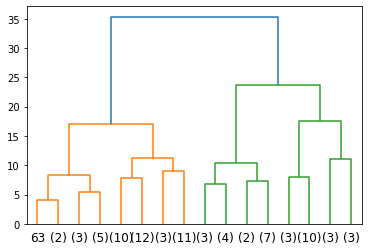

In [9]:
#This scaled data can then be fed into the HAC algorithm
from sklearn.cluster import AgglomerativeClustering
agglo_cluster= AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X_scaled)
agglo_cluster.labels_

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# plot the top three levels of the dendrogram
plot_dendrogram(agglo_cluster, truncate_mode='level', p=3)
    



In [10]:
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
from sklearn.preprocessing import normalize 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [11]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [12]:
X_principal

,P1,P2
0,-0.504053,-0.149795
1,-0.560450,-0.385387
2,-0.532097,-0.246730
3,-0.533904,0.037446
4,-0.112547,0.767965
...,...,...
77,-0.424459,-0.160887
78,-0.568107,-0.321691
79,-0.495559,-0.399469
80,-0.582460,-0.501984


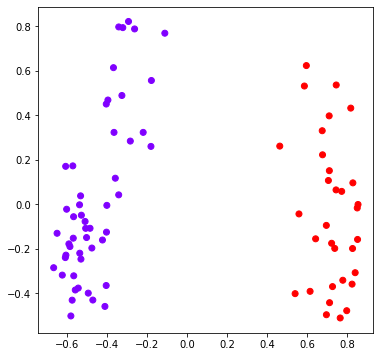

In [13]:
import matplotlib.pyplot as plt 
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

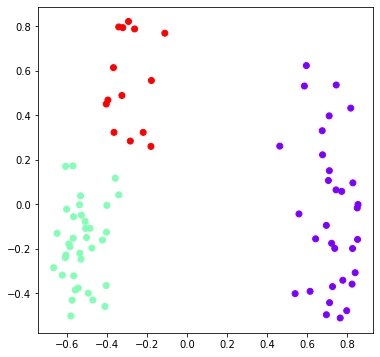

In [14]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

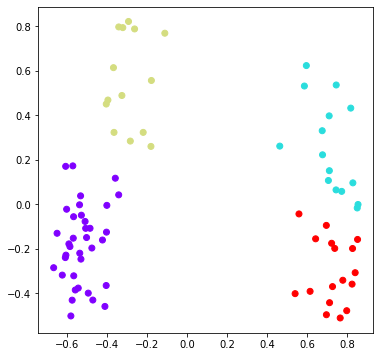

In [15]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

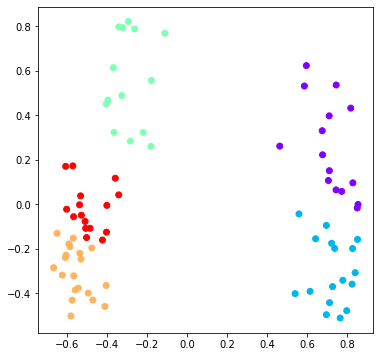

In [16]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

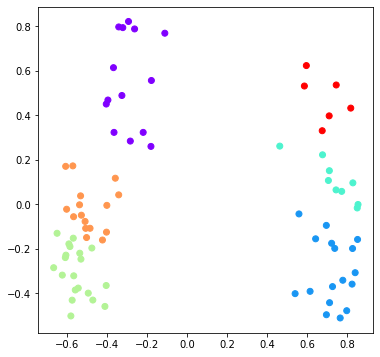

In [17]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

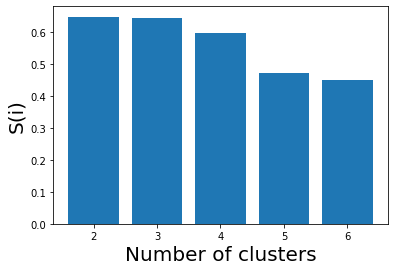

In [18]:
from sklearn.metrics import silhouette_score 
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

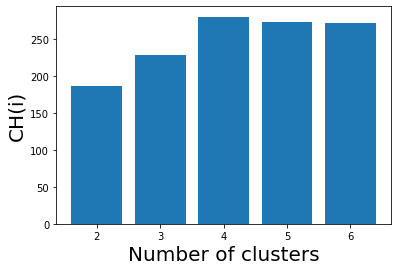

In [19]:
from sklearn.metrics import calinski_harabasz_score
# Appending the CH scores of the different models to the list 
ch_scores = [] 
ch_scores.append( 
        calinski_harabasz_score(X_principal, ac2.fit_predict(X_principal))) 
ch_scores.append( 
        calinski_harabasz_score(X_principal, ac3.fit_predict(X_principal))) 
ch_scores.append( 
        calinski_harabasz_score(X_principal, ac4.fit_predict(X_principal))) 
ch_scores.append( 
        calinski_harabasz_score(X_principal, ac5.fit_predict(X_principal))) 
ch_scores.append( 
        calinski_harabasz_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, ch_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('CH(i)', fontsize = 20) 
plt.show() 

In [20]:
# Use PCA for dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(feature_table.values)

pca_result = pca.transform(feature_table.values)
pca_table1 = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'f5','f6', 'f7', 'f8', 'f9', 'f10'])
for i in range(10):
    pca_table1[f'f{i+1}'] = pca_result[:,i]
pca.explained_variance_ratio_

array([6.99668267e-01, 2.88876793e-01, 6.22521046e-03, 2.56509917e-03,
       8.83353240e-04, 6.63754072e-04, 6.08570309e-04, 4.29814930e-04,
       3.63117922e-05, 2.58066979e-05])

In [21]:
from sklearn.cluster import KMeans
import numpy as np
pca_array = pca_table1.to_numpy()
train = pca_array[:int(pca_array.shape[0]*0.8),:]
test = pca_array[int(pca_array.shape[0]*0.8):,:]
kmeans = KMeans(n_clusters=3, random_state=0).fit(train)
kmeans.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
 from sklearn.cluster import Birch
brc = Birch(n_clusters=2).fit(train)
brc.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
!pip install seaborn

    100% |████████████████████████████████| 286kB 29.3MB/s ta 0:00:01
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


<AxesSubplot:xlabel='f1', ylabel='f2'>

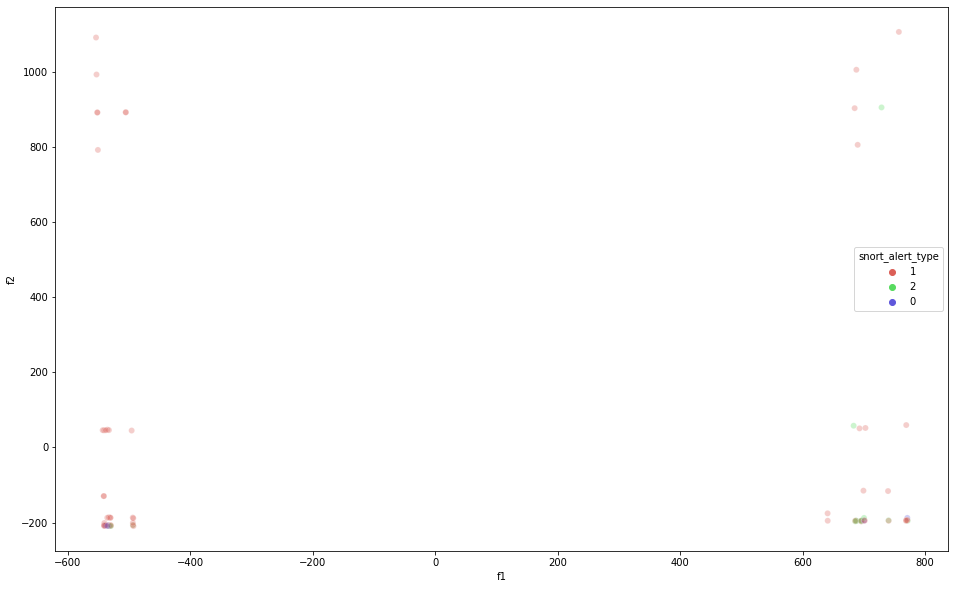

In [24]:
import seaborn as sns

plt.figure(figsize=(16,10))
pca_table1['snort_alert_type'] = data['snort_alert_type']
pca_table1['snort_alert_type'] = pca_table1['snort_alert_type'].astype('str')
sns.scatterplot(x='f1', y='f2', hue='snort_alert_type', palette=sns.color_palette("hls",3), legend="full", data=pca_table1, alpha=0.3)

In [25]:
from sklearn import metrics
metrics.adjusted_rand_score(kmeans.predict(test), label_array[-len(test):])

0.0

In [26]:
feature_array = feature_table.to_numpy()
feature_array

array([[  42.    ,    0.    ,    2.    , ...,    0.    ,    0.    ,
        1350.55  ],
       [  42.    ,    0.    ,    2.    , ...,    0.    ,    0.    ,
        1350.55  ],
       [  42.    ,    0.    ,    2.    , ...,  -56.2576,    0.    ,
        1350.55  ],
       ...,
       [  42.    ,    0.    ,    2.    , ...,   43.5386,    0.    ,
          43.4815],
       [  42.    ,    0.    ,    2.    , ...,    0.    ,    0.    ,
          43.4815],
       [  42.    ,    0.    ,    2.    , ...,    0.    ,    0.    ,
          43.4815]])

In [27]:
label_array = data[['Label']].to_numpy().flatten()
label_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_array, label_array, test_size=0.33, random_state=42)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.63


In [29]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test, predictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,predictions)))
print('Report : ')
print(classification_report(y_test,predictions))

Confusion Matrix :
[[ 7  5]
 [ 6 10]]
Accuracy Score :0.6071428571428571
Report : 
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.67      0.62      0.65        16

    accuracy                           0.61        28
   macro avg       0.60      0.60      0.60        28
weighted avg       0.61      0.61      0.61        28



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.63')

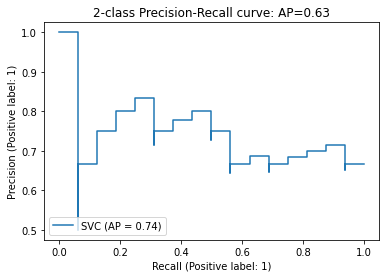

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [31]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dtpredictions = dt.predict(X_test)

average_precision = average_precision_score(y_test, dtpredictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.91


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.91')

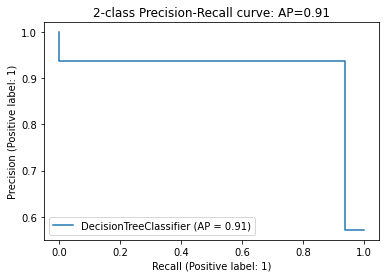

In [32]:
disp = plot_precision_recall_curve(dt, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [33]:
results = confusion_matrix(y_test, dtpredictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,dtpredictions)))
print('Report : ')
print(classification_report(y_test,dtpredictions))

Confusion Matrix :
[[11  1]
 [ 1 15]]
Accuracy Score :0.9285714285714286
Report : 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.94      0.94      0.94        16

    accuracy                           0.93        28
   macro avg       0.93      0.93      0.93        28
weighted avg       0.93      0.93      0.93        28



Average precision-recall score: 0.79


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.79')

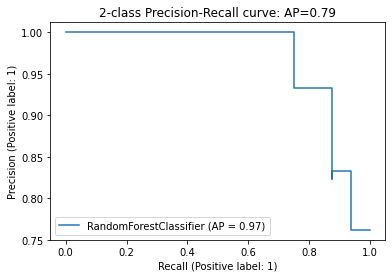

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rfpredictions = rf.predict(X_test)

average_precision = average_precision_score(y_test, rfpredictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [35]:
results = confusion_matrix(y_test, rfpredictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,rfpredictions)))
print('Report : ')
print(classification_report(y_test,rfpredictions))

Confusion Matrix :
[[ 9  3]
 [ 2 14]]
Accuracy Score :0.8214285714285714
Report : 
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.82      0.88      0.85        16

    accuracy                           0.82        28
   macro avg       0.82      0.81      0.82        28
weighted avg       0.82      0.82      0.82        28



Average precision-recall score: 0.61


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.61')

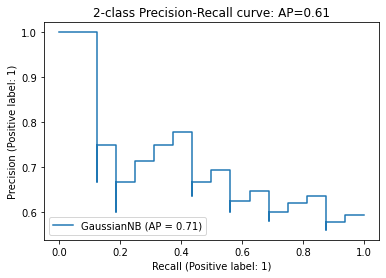

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnbpredictions = gnb.predict(X_test)

average_precision = average_precision_score(y_test, gnbpredictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(gnb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [37]:
results = confusion_matrix(y_test, gnbpredictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,gnbpredictions)))
print('Report : ')
print(classification_report(y_test,gnbpredictions))

Confusion Matrix :
[[7 5]
 [7 9]]
Accuracy Score :0.5714285714285714
Report : 
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.64      0.56      0.60        16

    accuracy                           0.57        28
   macro avg       0.57      0.57      0.57        28
weighted avg       0.58      0.57      0.57        28



Average precision-recall score: 0.60


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.60')

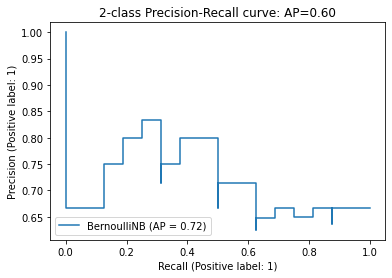

In [38]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnbpredictions = bnb.predict(X_test)

average_precision = average_precision_score(y_test, bnbpredictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(bnb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [39]:
results = confusion_matrix(y_test, bnbpredictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,bnbpredictions)))
print('Report : ')
print(classification_report(y_test,bnbpredictions))

Confusion Matrix :
[[ 6  6]
 [ 6 10]]
Accuracy Score :0.5714285714285714
Report : 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.62      0.62      0.62        16

    accuracy                           0.57        28
   macro avg       0.56      0.56      0.56        28
weighted avg       0.57      0.57      0.57        28



Average precision-recall score: 0.57


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.57')

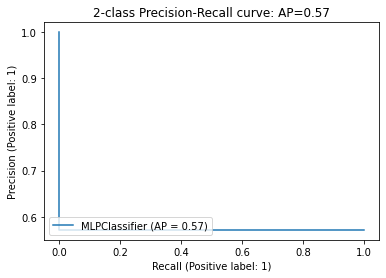

In [40]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train, y_train)
nnpredictions = nn.predict(X_test)

average_precision = average_precision_score(y_test, nnpredictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(nn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [41]:
results = confusion_matrix(y_test, nnpredictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,nnpredictions)))
print('Report : ')
print(classification_report(y_test,nnpredictions))

Confusion Matrix :
[[ 0 12]
 [ 0 16]]
Accuracy Score :0.5714285714285714
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      1.00      0.73        16

    accuracy                           0.57        28
   macro avg       0.29      0.50      0.36        28
weighted avg       0.33      0.57      0.42        28



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Now use PCA for dimensional reduction and reperform the supervised learning
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(feature_table.values)

pca_result = pca.transform(feature_table.values)
pca_table1 = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'f5','f6', 'f7', 'f8', 'f9', 'f10'])
for i in range(10):
    pca_table1[f'f{i+1}'] = pca_result[:,i]
    
pca_feature_array = pca_table1.to_numpy()

Average precision-recall score: 0.63


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.63')

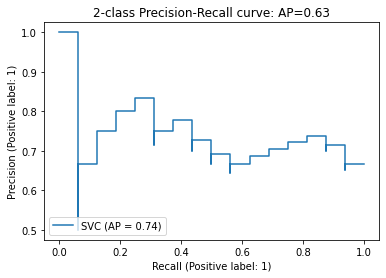

In [43]:
X_train, X_test, y_train, y_test = train_test_split(pca_feature_array, label_array, test_size=0.33, random_state=42)

clf_pca = svm.SVC()
clf_pca.fit(X_train, y_train)
clf_pca_predictions = clf_pca.predict(X_test)

average_precision = average_precision_score(y_test, clf_pca_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clf_pca, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [44]:
results = confusion_matrix(y_test, clf_pca_predictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,clf_pca_predictions)))
print('Report : ')
print(classification_report(y_test,clf_pca_predictions))

Confusion Matrix :
[[ 7  5]
 [ 6 10]]
Accuracy Score :0.6071428571428571
Report : 
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.67      0.62      0.65        16

    accuracy                           0.61        28
   macro avg       0.60      0.60      0.60        28
weighted avg       0.61      0.61      0.61        28



Average precision-recall score: 0.74


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

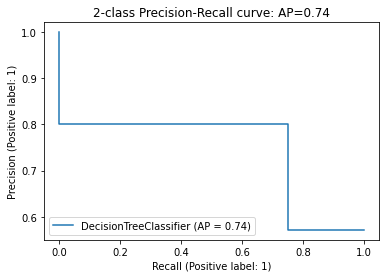

In [45]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pca_predictions = dt.predict(X_test)

average_precision = average_precision_score(y_test, dt_pca_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(dt, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [46]:


results = confusion_matrix(y_test, dt_pca_predictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,dt_pca_predictions)))
print('Report : ')
print(classification_report(y_test,dt_pca_predictions))

Confusion Matrix :
[[ 9  3]
 [ 4 12]]
Accuracy Score :0.75
Report : 
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.80      0.75      0.77        16

    accuracy                           0.75        28
   macro avg       0.75      0.75      0.75        28
weighted avg       0.75      0.75      0.75        28



Average precision-recall score: 0.79


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.79')

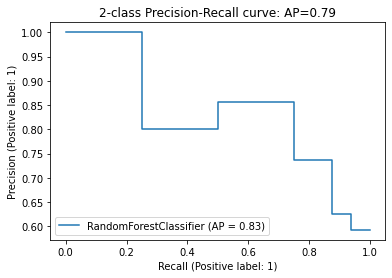

In [47]:
rf_pca = RandomForestClassifier(n_estimators=10)
rf_pca.fit(X_train, y_train)
rf_pca_predictions = rf_pca.predict(X_test)

average_precision = average_precision_score(y_test, rf_pca_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(rf_pca, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [48]:
results = confusion_matrix(y_test, rf_pca_predictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,rf_pca_predictions)))
print('Report : ')
print(classification_report(y_test,rf_pca_predictions))

Confusion Matrix :
[[10  2]
 [ 4 12]]
Accuracy Score :0.7857142857142857
Report : 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.86      0.75      0.80        16

    accuracy                           0.79        28
   macro avg       0.79      0.79      0.78        28
weighted avg       0.80      0.79      0.79        28



Average precision-recall score: 0.58


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.58')

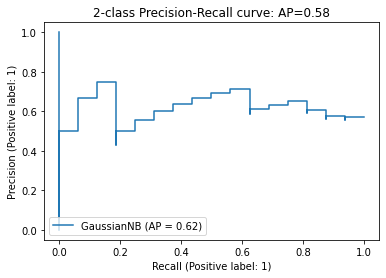

In [49]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pca_predictions = gnb.predict(X_test)

average_precision = average_precision_score(y_test, gnb_pca_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(gnb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [50]:
results = confusion_matrix(y_test, gnb_pca_predictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,gnb_pca_predictions)))
print('Report : ')
print(classification_report(y_test,gnb_pca_predictions))

Confusion Matrix :
[[ 5  7]
 [ 6 10]]
Accuracy Score :0.5357142857142857
Report : 
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.59      0.62      0.61        16

    accuracy                           0.54        28
   macro avg       0.52      0.52      0.52        28
weighted avg       0.53      0.54      0.53        28



Average precision-recall score: 0.69


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.69')

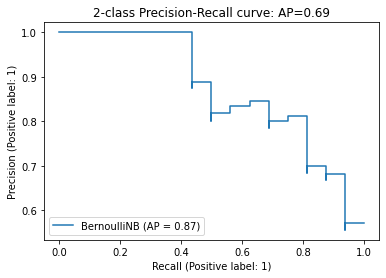

In [51]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pca_predictions = bnb.predict(X_test)

average_precision = average_precision_score(y_test, bnb_pca_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(bnb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [52]:
results = confusion_matrix(y_test, bnb_pca_predictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,bnb_pca_predictions)))
print('Report : ')
print(classification_report(y_test,bnb_pca_predictions))

Confusion Matrix :
[[ 7  5]
 [ 3 13]]
Accuracy Score :0.7142857142857143
Report : 
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.72      0.81      0.76        16

    accuracy                           0.71        28
   macro avg       0.71      0.70      0.70        28
weighted avg       0.71      0.71      0.71        28



Average precision-recall score: 0.59


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.59')

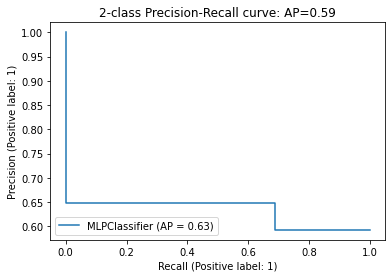

In [53]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train, y_train)
nn_pca_predictions = nn.predict(X_test)

average_precision = average_precision_score(y_test, nn_pca_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
disp = plot_precision_recall_curve(nn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [54]:
results = confusion_matrix(y_test, nn_pca_predictions) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'+str(accuracy_score(y_test,nn_pca_predictions)))
print('Report : ')
print(classification_report(y_test,nn_pca_predictions))

Confusion Matrix :
[[ 1 11]
 [ 0 16]]
Accuracy Score :0.6071428571428571
Report : 
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.59      1.00      0.74        16

    accuracy                           0.61        28
   macro avg       0.80      0.54      0.45        28
weighted avg       0.77      0.61      0.49        28

